<a href="https://colab.research.google.com/github/Keslon-1-0/Keslon-1-0/blob/main/Cryto_Investment_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3533096135.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3533096135.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3533096135.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3533096135.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3

Data for plotting:
         Initial Price  Current Price  Percentage Increase  Value of $100
BTC-USD   20296.707031  115440.812500           468.766216     568.766216
ETH-USD    1580.787964    4504.506836           184.953260     284.953260
ETC-USD      36.103222      21.489172           -40.478520      59.521480
SOL-USD      33.430817     232.073578           594.190574     694.190574
XRP-USD       0.333692       3.041889           811.585852     911.585852


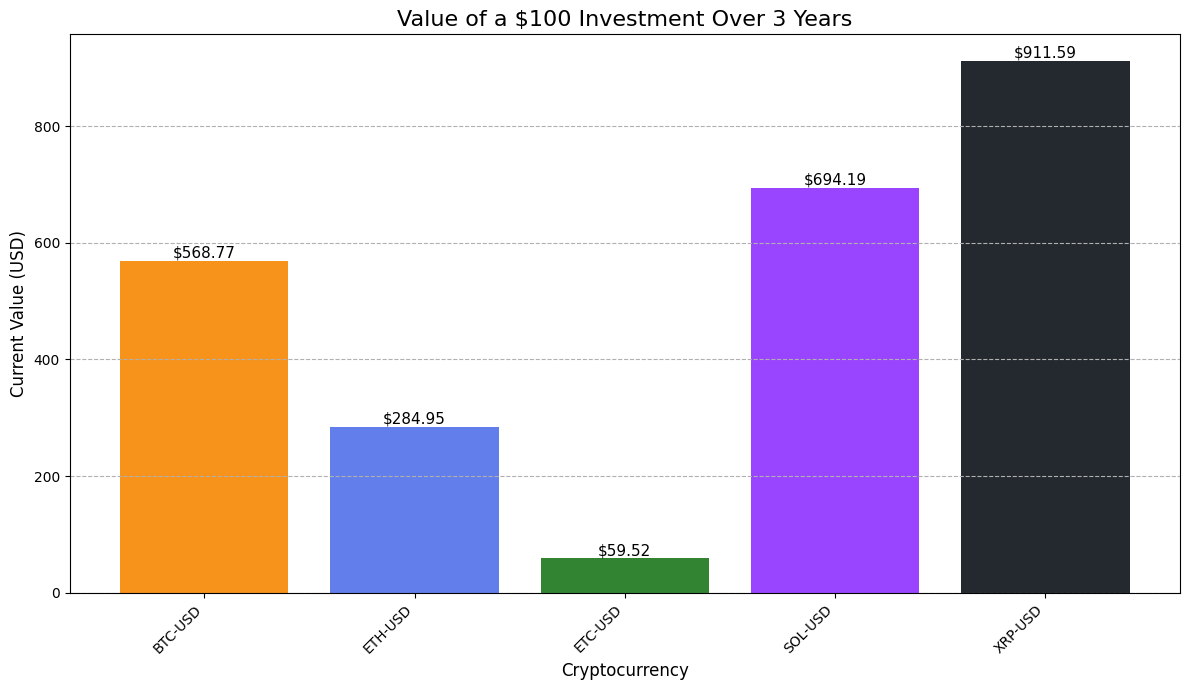

In [ ]:
# 필요한 라이브러리를 설치합니다.
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 암호화폐 티커 리스트
# Bitcoin, Ethereum, Ethereum Classic, Solana, Ripple
tickers = ['BTC-USD', 'ETH-USD', 'ETC-USD', 'SOL-USD', 'XRP-USD']

# 조회 기간 설정 (3년 전부터 현재까지)
end_date = datetime.now()
start_date = end_date - timedelta(days=3*365)

# 결과 저장을 위한 데이터프레임 생성
results = pd.DataFrame(columns=['Initial Price', 'Current Price', 'Percentage Increase', 'Value of $100'])

# 각 암호화폐에 대한 데이터 다운로드 및 계산
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)

    # 데이터가 유효한지 확인
    if data.empty or data['Close'].dropna().empty:
        print(f"Warning: No valid data found for {ticker}")
        continue  # 다음 티커로 넘어감

    # 'Close' 컬럼이 Series 형태인지 확인 (DataFrame일 경우 첫 번째 열을 사용)
    close_prices = data['Close']
    if isinstance(close_prices, pd.DataFrame):
        close_prices = close_prices.iloc[:, 0]

    # 결측치 제거
    clean_prices = close_prices.dropna()

    # 첫 번째와 마지막 가격을 단일 값(스칼라)으로 추출
    initial_price = clean_prices.iloc[0]
    current_price = clean_prices.iloc[-1]

    # 가격이 0보다 큰지 확인하여 0으로 나누는 오류 방지
    if initial_price > 0:
        percentage_increase = ((current_price - initial_price) / initial_price) * 100
        value_of_100 = (current_price / initial_price) * 100
        results.loc[ticker] = [initial_price, current_price, percentage_increase, value_of_100]
    else:
        print(f"Warning: Initial price for {ticker} is zero. Skipping calculation.")

# 시각화하기 전에 NaN 값이 있는 행을 제거
results.dropna(inplace=True)

# 결과 출력 (데이터 확인용)
print("Data for plotting:")
print(results)

# 데이터가 비어있지 않은 경우에만 그래프 생성
if not results.empty:
    # 시각화: 100달러 투자의 현재 가치 비교
    plt.figure(figsize=(12, 7))
    bars = plt.bar(results.index, results['Value of $100'], color=['#F7931A', '#627EEA', '#328332', '#9945FF', '#23292F'])

    # 바 위에 현재 가치 표시
    for bar in bars:
        yval = bar.get_height()
        # '{yval:.2f}$' 형식으로 소수점 둘째 자리까지의 달러 값을 표시
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:,.2f}', va='bottom', ha='center', fontsize=11)

    # 차트 제목 및 레이블 설정 (영문)
    plt.title('Value of a $100 Investment Over 3 Years', fontsize=16)
    plt.xlabel('Cryptocurrency', fontsize=12)
    plt.ylabel('Current Value (USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')

    # 차트 레이아웃 조정 및 저장
    plt.tight_layout()
    plt.savefig('cryptocurrency_investment_growth.png')
    plt.show()
else:
    print("No data available to plot after cleaning.")